In [1]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time
from data_aug import *
from NMS  import NMS
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
# use this to change which GPU to use
gpu = 0
import tensorflow as tf
# set the modified tf session as backend in keras
setup_gpu(gpu)

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)
keras.backend.tensorflow_backend.set_session(get_session())


Using TensorFlow backend.


In [2]:
# adjust this to point to your downloaded/trained model
# models can be downloaded here: https://github.com/fizyr/keras-retinanet/releases

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)
keras.backend.tensorflow_backend.set_session(get_session())

model_path = os.path.join( 'IDS_4_it_c.h5')
# load retinanet model
model = models.load_model(model_path)

# if the model is not converted to an inference model, use the line below
# see: https://github.com/fizyr/keras-retinanet#converting-a-training-model-to-inference-model
#model = models.convert_model(model)

#print(model.summary())

# load label to names mapping for visualization purposes
labels_to_names = { 0: 'Borjomi_glass',
                    1: 'morshin_ pine_water_lemon',
                    2: 'morshin_ pine_water_mint',
                    3: 'morshin_ pine_water_ bilberry',
                    4: 'Borjomi_plastic',
                    5: 'aqua_nyanya_5',
                    6: 'aqua_nyanya_033',
                    7: 'aqua_nyanya_sport',
                    8: 'morshin_peppa_pig',
                    9: 'morshin_princess',
                    10: 'morshin_spiderman',
                    11: 'morshin_b / g_033',
                    12: 'morshin_sport',
                    13: 'morshin_b / g',
                    14: 'truskavetska_g_1_5',
                    15: 'morshin_b / g_1_5',
                    16: 'morshin_low / g_1_5',
                    17: 'morshin_g',
                    18: 'mirgorod_05',
                    19: 'mirgorod_lagidna_05',
                    20: 'morshin_Junior',
                    21: 'truskavetska_g_05',
                    22: 'mirgorod_1_5',
                    23: 'mirgorod_lagidna_1_5',
                    24: 'morshin_premium_b / g',
                    25: 'Borjomi_plastic_2',
                    26: 'borjomi_g / b',
                    27: 'morshin_6',
                    28: 'morshinka_6',
                    29: 'aqua_nyanya_1,_5',
                    30: 'morshin_low / g', 31: 'aqualife_6',
                    32: 'morshin_b / g_1_5_3 + 1promo_pack',
                    33: 'morshin_low / g_1_5_3 + 1promo_pack',
                    34: 'morshinka_1_5',
                    35: 'truskavetska_low / g_1_5',
                    36: 'truskavetska_b / g_1_5',
                    37: 'morshin_3',
                    38: 'morshin_sportik_033',
                    39: 'morshinka_sport',
                    40: 'mirgorod_1_5_6pack',
                    41: 'mirgorod_lagidna_1_5_6pack',
                    42: 'morshin_premium_low / g',
                    43: 'morshin_low / g_1_5_6pack',
                    44: 'morshin_b / g_1_5_6pack',
                    45: 'morshin_3_2pack',
                    46: 'truskavetska_b / g_05',
                    47: 'borjomi_6pack',
                    48: 'morshin_low / g_12pack',
                    49: 'morshin_b / g_033_12pack',
                    50: 'morshin_b / g_12pack',
                    51: 'morshin_premium_b / g_12pack',
                    52: 'morshin_premium_low / g_12pack',
                    53: 'morshin_premium_b / g_6pack',
                    54: 'morshin_premium_low / g_6pack',
                    55: 'pack_spiderman',
                    56: 'pack_peppa_pig',
                    57: 'morshin_sport_12pack',
                    58: 'mirgorod_05_12pack',
                    59: 'pack_pine_water_lemon',
                    60: 'pack_ pine_water_ bilberry',
                    61: 'pack_ pine_water_mint',
                    62: 'pack_sportic',
                    63: 'pack_Junior',
                    64: 'pack_truskav_b / g_05',
                    65: 'pack_truskav_low / g_05',
                    66: 'pack_truskav_g_05',
                    67: 'pack_truskav_g_1_5',
                    68: 'pack_truskav_b / g_1_5',
                    69: 'pack_truskav_low / g_1_5',
                    70: 'morshin_g_6pack',
                    71: 'pack_aqualife',
                    72: 'pack_morshinka_033',
                    73: 'pack_aquanyanya_sport',
                    74: 'pack_aquanyanya_033',
                    75: 'pack_morshinka_sport',
                    76: 'pack_morshinka_1_5',
                    77: 'aqua_nyanya_1_5_6pack',
                    78: 'borjomi_033_CAN_12pack_summer',
                    79: 'borjomi_12pack',
                    80: 'pack_borjomi_gb',
                    81: 'borjomi_033_CAN_4pack_summer',
                    82: 'borjomi_05_glass_5 + 1promo_pack',
                    83: 'morshinka_033',
                    84: 'morshin_b / g_05_5 + 1promo_pack',
                    85: 'morshin_sport_5 + 1promo_pack',
                    86: 'morshin_6_2pack',
                    87: 'pack_princess',
                    88: 'borjomi_033_CAN_4pack_regular',
                    89: 'morshin_b / g_1_5_5 + 1promo_pack',
                    90: 'morshin_low / g_1_5_5 + 1promo_pack',
                    91: 'truskavetska_low / g_05',
                    92: 'borjomi_g / b_summer',
                    93: 'morshin_033_Junior',
                    94: 'morshin_b / g_1_5_12pack',
                    95: 'borjomi_4pack_summer',
                    96: 'morshin_b / g_05_6pack',
                    97: 'pack_morshinka_sportik',
                    98: 'mirgorod_lagidna_05_12pack',
                    99: 'Borjomi 0.33 CAN 4 pack summer',
                    100: 'Borjomi_0.33_CAN_4_ pack_summer'
                   }

tracking <tf.Variable 'Variable:0' shape=(15, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_1:0' shape=(15, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_2:0' shape=(15, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_3:0' shape=(15, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_4:0' shape=(15, 4) dtype=float32> anchors

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [203]:
def create_bbs(df,image):
    b = []
    for i in range(len(df)):
        b.append(BoundingBox(x1 =df.iloc[i][0], y1 = df.iloc[i][1], x2 = df.iloc[i][2], y2 = df.iloc[i][3] ))
    bbs = BoundingBoxesOnImage(b,  shape=image.shape)
    return bbs

In [204]:
def transform_back(num, scale,res, image):
    boxes, scores, labels = res[num]
    df = pd.DataFrame(boxes[0])
    bbs = create_bbs(df, image)

    
    seq = iaa.Sequential([
        iaa.Affine(scale=1/scale)
    ])
    boxes = []
    # Augment BBs and images.
    bbs_aug = seq( bounding_boxes = bbs)

    for i in range(len(bbs.bounding_boxes)):
        before = bbs.bounding_boxes[i]
        after = bbs_aug.bounding_boxes[i]
        boxes.append([int(after.x1), int(after.y1),int(after.x2), int(after.y2)])
    boxes = np.array([boxes])
    return boxes, scores, labels

In [205]:
def TTAo(image, model):
    image_list = []
    image_list.append(image)
    image_list.append(change_brightness(image, 70))
    image_list.append(change_brightness(image, -70))
    image_list.append(closer(image, 0.5))
    image_list.append(closer(change_brightness(image, -30), 0.5))
    image_list.append(closer(change_brightness(image, 40), 0.7))
    res = {}
    for i in range(len(image_list)):
        
        # preprocess image for network

        image = preprocess_image(image_list[i])
        image, scale = resize_image(image)

        # process image
        start = time.time()
        boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
        print("processing time: ", time.time() - start)
        
        boxes, scores, labels  = NMS(boxes, scores, labels, THRESH=.5, IoU_trash=.3)
        
        # correct for image scale
        boxes /= scale
       
        res[i] = [boxes, scores, labels]
    many = []
    many.append(transform_back(0,1, res,image_list[0]))
    many.append(transform_back(1,1,res,image_list[1]))
    many.append(transform_back(2,1,res,image_list[2]))
    many.append(transform_back(3,0.5,res,image_list[3]))
    many.append(transform_back(4,0.5,res,image_list[4]))
    many.append(transform_back(5,0.7,res,image_list[5]))
    resss_l = []
    resss_s = []
    resss_b = []

    for i in range(len(many)):
        for j in range(len(many[i][0][0])):
            resss_b.append((many[i][0][0][j]))
            resss_l.append((many[i][2][0][j]))
            resss_s.append((many[i][1][0][j]))
   
 
    boxes = np.array([resss_b])
    scores = np.array([resss_s])
    labels = np.array([resss_l])
    boxes_NMS, scores_NMS, labels_NMS  = NMS(boxes, scores, labels, THRESH=.5, IoU_trash=.5)
    
    boxes_NMS = boxes_NMS.tolist()[0]
    scores_NMS = scores_NMS.tolist()[0]
    labels_NMS = labels_NMS.tolist()[0]
    return boxes_NMS, scores_NMS, labels_NMS


In [206]:
path = 'images/Z1_outsfile0Image00016.jpg'
image = read_image_bgr(path)
boxes_NMS,scores_NMS,labels_NMS = TTAo(image, model)

processing time:  2.8828039169311523
processing time:  2.6510345935821533
processing time:  2.667393445968628
processing time:  2.682281494140625
processing time:  2.69197940826416
processing time:  2.7254111766815186


In [192]:
indices = np.where(scores_NMS > 0.5)[0]

In [198]:
indices
scores = scores_NMS[indices]
scores_sort = np.argsort(-scores)[:100]

In [201]:
image_boxes      = boxes_NMS[ indices[scores_sort], :]
image_scores     = scores[scores_sort]
image_labels     = labels_NMS[ indices[scores_sort]]

In [202]:
image_boxes

array([[ 241,  236,  301,  381],
       [1137,  459, 1272,  726],
       [ 910,  453, 1047,  725],
       [1029,  459, 1162,  724],
       [ 291,  237,  349,  384],
       [ 193,  235,  252,  379]])

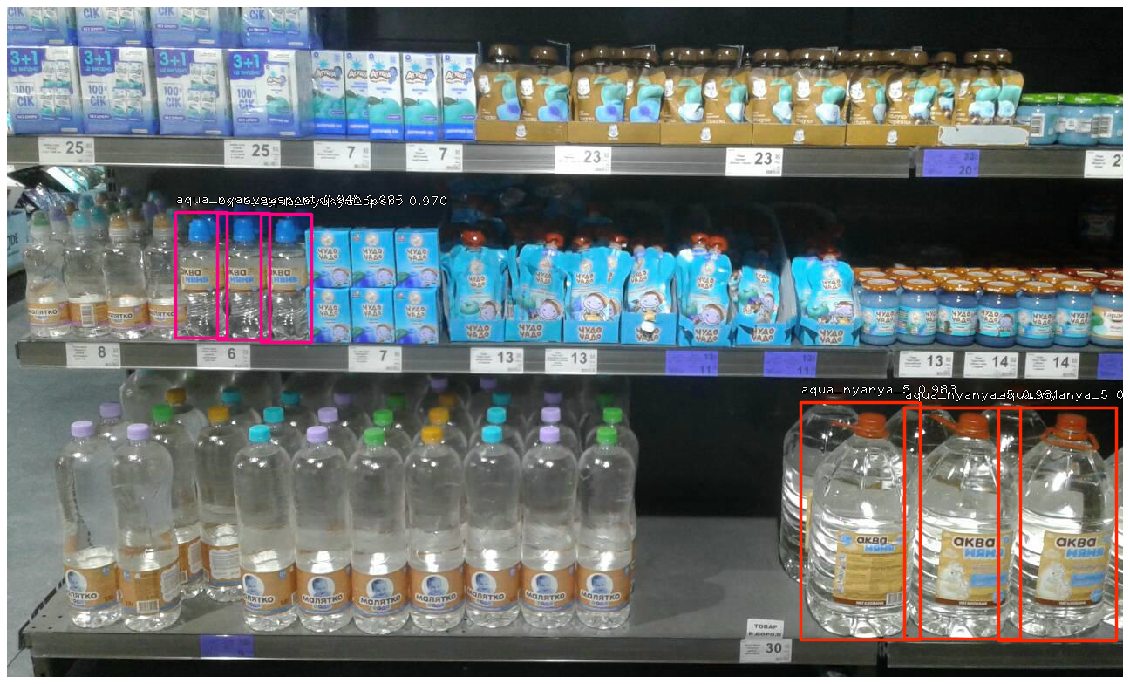

In [188]:
hello1 = []
for box, score, label in zip(boxes_NMS, scores_NMS, labels_NMS):
    if score < 0.5:
        break

    color = label_color(label)

    draw_box(image, box, color=color)
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(image, box, caption)
    hello1.append("{} {:.3f}".format(labels_to_names[label], score))
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.imshow(image)

In [146]:
hello

['aqua_nyanya_sport 0.987',
 'aqua_nyanya_sport 0.985',
 'aqua_nyanya_5 0.985',
 'aqua_nyanya_5 0.984',
 'aqua_nyanya_5 0.981',
 'aqua_nyanya_sport 0.969']

In [150]:
hello1

['aqua_nyanya_sport 0.987',
 'aqua_nyanya_sport 0.985',
 'aqua_nyanya_5 0.985',
 'aqua_nyanya_5 0.984',
 'aqua_nyanya_5 0.981',
 'aqua_nyanya_sport 0.969']

In [14]:
path = 'images/Z1_outsfile0Image00016.jpg'
paths = ['images/Z1_outsfile0Image00016.jpg','images/Z1_outsfile0Image00004.jpg','images/Z1_outsfile0img2_100.jpg']

image = read_image_bgr(path)
image, scale = resize_image(image)

In [25]:
df = pd.read_csv('annotation_eval.csv', header = None)

In [28]:
k = []
for i in set(df[0]):
    k.append(i)

In [29]:
test = k[:5]

In [46]:
df_test1 = df[df[0] == test[0]]
df_test2 = df[df[0] == test[1]]
df_test3 = df[df[0] == test[2]]
df_test4 = df[df[0] == test[3]]
frames = [df_test1, df_test2, df_test3,df_test4]

df_test = pd.concat(frames)

In [113]:
df_test.to_csv('test2.csv', header = None, index = None)

In [48]:
images = []
for i in set(df_test[0]):
    images.append(i)

In [49]:
images

['images/Z1_outsfile0img2_108.jpg',
 'images/Z1_outsfile0img2_131.jpg',
 'images/Z1_outsfile0img2_119.jpg',
 'images/Z1_outsfile0img2_107.jpg']

In [99]:
from TTA_module import TTA
all_detections = [[None for i in range(len(labels_to_names)) ] for j in range(len(images))]

for i in range(len(images)):
    print(images[i])
    image = read_image_bgr(images[i])
    boxes,scores,labels = TTA(image, model)
    image_boxes      = boxes
    image_scores     = scores
    image_labels     = labels
#     image_ = preprocess_image(image)
#     image_, scale = resize_image(image_)

#     # 
#     boxes, scores, labels = model.predict_on_batch(np.expand_dims(image_, axis=0))
#     boxes /= scale
    
#     indices = np.where(scores[0,:]>0)[0]
#     scores = scores[0][indices]
#     scores_sort = np.argsort(-scores)[:100]

#     image_boxes      = boxes[0, indices[scores_sort], :]
#     image_scores     = scores[scores_sort]
#     image_labels     = labels[0, indices[scores_sort]]

    image_detections = np.concatenate([image_boxes, np.expand_dims(image_scores, axis=1), np.expand_dims(image_labels, axis=1)], axis=1)
    for label in range(len(labels_to_names)):
        all_detections[i][label] = image_detections[image_detections[:, -1] == label, :-1]
        print(all_detections[i][label])

images/Z1_outsfile0img2_108.jpg
processing time:  2.3698854446411133
processing time:  2.180922031402588
[[887.         163.         941.         344.           0.99283135]]
[[265.         526.         376.         575.           0.95836759]
 [265.         469.         380.         519.           0.93872201]]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[[517.         667.         578.         889.           0.96099114]]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[[673.         128.         734.         340.           0.94954956]
 [631.         140.         681.         341.           0.93657255]
 [804.         147.         856.         342.           0.93267876]
 [752.         145.         804.         345.           0.93094587]]
[]
[[3.90000000e+02 9.37000000e+02 4.97000000e+02 1.14500000e+03
  9.98060882e-01]
 [3.10000000e+02 9.37000000e+02 3.96000000e+02 1.08300000e+03
  9.85435545e-01]
 [1.85000000e+02 9.37000000e+02 2.97000000e+02 1.14200000e+03
  9.94900465e-01]
 [4.94000000e+02 9.37000000e+02 5.8800

In [100]:
all_detections[0]

[array([[887.        , 163.        , 941.        , 344.        ,
           0.99283135]]),
 array([[265.        , 526.        , 376.        , 575.        ,
           0.95836759],
        [265.        , 469.        , 380.        , 519.        ,
           0.93872201]]),
 array([], shape=(0, 5), dtype=float64),
 array([], shape=(0, 5), dtype=float64),
 array([], shape=(0, 5), dtype=float64),
 array([], shape=(0, 5), dtype=float64),
 array([], shape=(0, 5), dtype=float64),
 array([], shape=(0, 5), dtype=float64),
 array([], shape=(0, 5), dtype=float64),
 array([], shape=(0, 5), dtype=float64),
 array([], shape=(0, 5), dtype=float64),
 array([], shape=(0, 5), dtype=float64),
 array([], shape=(0, 5), dtype=float64),
 array([], shape=(0, 5), dtype=float64),
 array([], shape=(0, 5), dtype=float64),
 array([[517.        , 667.        , 578.        , 889.        ,
           0.96099114]]),
 array([], shape=(0, 5), dtype=float64),
 array([], shape=(0, 5), dtype=float64),
 array([], shape=(0, 5)

array([], shape=(0, 5), dtype=float64)

In [69]:
image_detections[:, -1]

array([27., 27.])

In [66]:
all_detections[0][0]

array([[887.        , 163.        , 941.        , 344.        ,
          0.99283135]])

In [60]:
boxes_NMS

array([[ 843,  936,  917, 1084],
       [ 748,  932,  854, 1142]])

In [61]:
scores_NMS

array([0.99519926, 0.98495007])

In [62]:
labels_NMS

array([27, 27])

In [59]:
image_detections

array([[8.43000000e+02, 9.36000000e+02, 9.17000000e+02, 1.08400000e+03,
        9.95199263e-01, 2.70000000e+01],
       [7.48000000e+02, 9.32000000e+02, 8.54000000e+02, 1.14200000e+03,
        9.84950066e-01, 2.70000000e+01]])